<a href="https://colab.research.google.com/github/kalana-mihiranga/Image-Captioning/blob/main/PHASE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Xformers not found - installing...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 131.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 298.5/557.1 MB 13.7 MB/s eta 0:00:19
ERROR: Operation cancelled by user

Initializing Stable Diffusion pipeline...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Optimization warning: Refer to https://github.com/facebookresearch/xformers for more information on how to install xformers
Proceeding without memory optimizations

Starting image generation...

Generating image 1/5
Prompt: A playful kitten interacting with a puppy in a sunny park, 4k detailed


  0%|          | 0/30 [00:00<?, ?it/s]

Saved to: generated_image_1_3116259284178048773.png

Generating image 2/5
Prompt: Hikers exploring a rugged mountain path at sunrise, dramatic lighting


  0%|          | 0/30 [00:00<?, ?it/s]

Saved to: generated_image_2_1146650483169446273.png

Generating image 3/5
Prompt: Urban scene with a red motorcycle speeding down a city street at night


  0%|          | 0/30 [00:00<?, ?it/s]

Saved to: generated_image_3_-3113632826633803815.png

Generating image 4/5
Prompt: Romantic couple walking along a tropical beach at sunset, cinematic


  0%|          | 0/30 [00:00<?, ?it/s]

Saved to: generated_image_4_-6358592839268701444.png

Generating image 5/5
Prompt: Curious tabby cat perched on a windowsill observing birds in garden


  0%|          | 0/30 [00:00<?, ?it/s]

Saved to: generated_image_5_6259519271599872260.png

Displaying results...


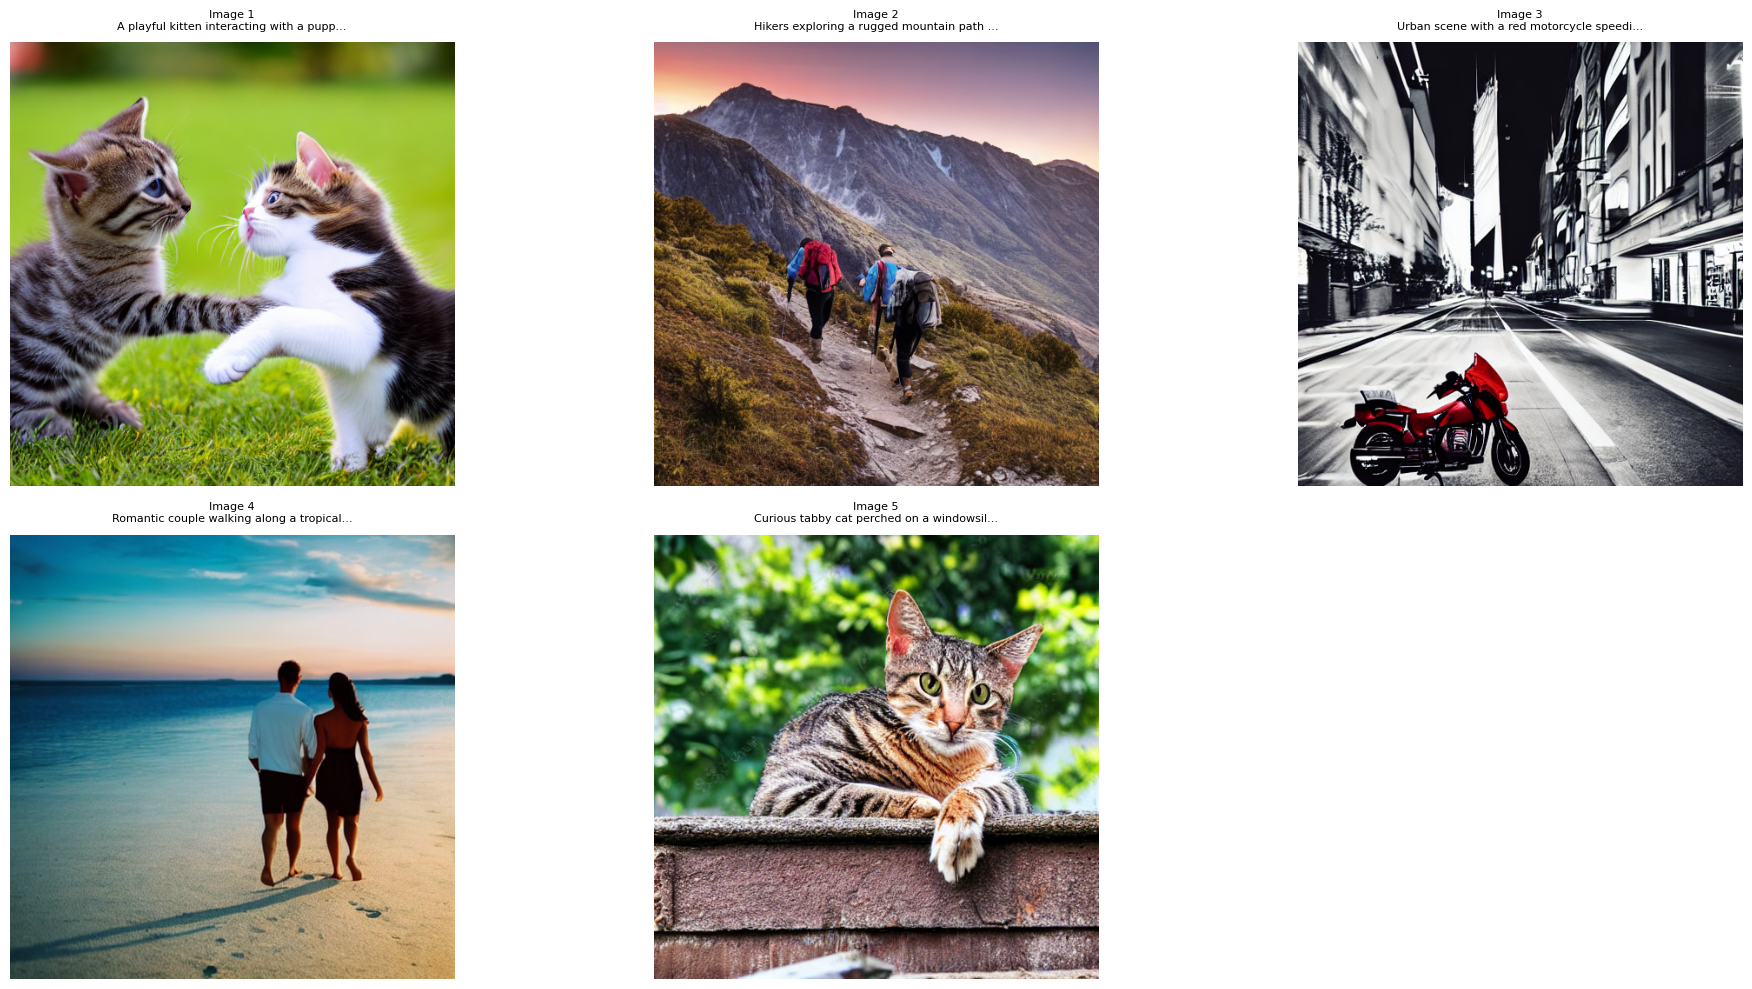


Process completed successfully!


In [2]:

# Import core libraries
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt
import warnings

def check_and_install_dependencies():
    """Ensure required packages are installed"""
    try:
        import xformers
    except ImportError:
        print("Xformers not found - installing...")
        !pip install xformers==0.0.20
    try:
        import diffusers
    except ImportError:
        print("Diffusers not found - installing...")
        !pip install diffusers transformers accelerate safetensors

def initialize_diffusion_model():
    """Initialize and configure the Stable Diffusion pipeline with error handling"""
    try:
        model_id = "runwayml/stable-diffusion-v1-5"
        device = "cuda" if torch.cuda.is_available() else "cpu"

        # Suppress HuggingFace token warning
        warnings.filterwarnings("ignore", message="The secret `HF_TOKEN` does not exist")

        pipeline = StableDiffusionPipeline.from_pretrained(
            model_id,
            torch_dtype=torch.float16,
            safety_checker=None,
            requires_safety_checker=False
        ).to(device)

        # Optional optimizations with fallbacks
        try:
            pipeline.enable_attention_slicing()
            pipeline.enable_xformers_memory_efficient_attention()
        except Exception as e:
            print(f"Optimization warning: {str(e)}")
            print("Proceeding without memory optimizations")

        return pipeline

    except Exception as e:
        print(f"Failed to initialize model: {str(e)}")
        raise

def generate_images(pipeline, prompts, save_images=False):
    """Generate images from text prompts with progress tracking"""
    generated_images = []

    for idx, prompt in enumerate(prompts, 1):
        print(f"\nGenerating image {idx}/{len(prompts)}")
        print(f"Prompt: {prompt}")

        try:
            result = pipeline(
                prompt,
                num_inference_steps=30,
                guidance_scale=7.5
            )
            img = result.images[0]
            generated_images.append(img)

            if save_images:
                output_path = f"generated_image_{idx}_{hash(prompt[:10])}.png"
                img.save(output_path)
                print(f"Saved to: {output_path}")

        except Exception as e:
            print(f"Error generating image {idx}: {str(e)}")
            generated_images.append(Image.new('RGB', (512, 512), color='gray'))

    return generated_images

def display_results(images, prompts):
    """Display generated images with formatted layout"""
    plt.figure(figsize=(20, 10))
    cols = min(3, len(images))
    rows = (len(images) + cols - 1) // cols

    for i, (img, prompt) in enumerate(zip(images, prompts)):
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.title(f"Image {i+1}\n{prompt[:40]}..." if len(prompt) > 40 else prompt,
                 fontsize=8, pad=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    """Main execution function with comprehensive setup"""
    # Verify dependencies
    check_and_install_dependencies()

    # Custom prompt collection
    text_prompts = [
        "A playful kitten interacting with a puppy in a sunny park, 4k detailed",
        "Hikers exploring a rugged mountain path at sunrise, dramatic lighting",
        "Urban scene with a red motorcycle speeding down a city street at night",
        "Romantic couple walking along a tropical beach at sunset, cinematic",
        "Curious tabby cat perched on a windowsill observing birds in garden"
    ]

    try:
        # Initialize pipeline
        print("\nInitializing Stable Diffusion pipeline...")
        sd_pipeline = initialize_diffusion_model()

        # Generate images
        print("\nStarting image generation...")
        output_images = generate_images(sd_pipeline, text_prompts, save_images=True)

        # Display results
        print("\nDisplaying results...")
        display_results(output_images, text_prompts)

        print("\nProcess completed successfully!")

    except Exception as e:
        print(f"\nFatal error: {str(e)}")
        print("Please check your environment setup and try again")

if __name__ == "__main__":
    main()